In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os.path import join as pjoin
import os
import numpy as np
import tqdm

In [2]:
files = os.listdir('results_realRIRs')

dataframes = []
for file in files:
    dataframes.append(pd.read_csv(pjoin('results_realRIRs', file)))

In [3]:
files_spk = os.listdir('results_speakerphone')

In [4]:
for file in files_spk:
    dataframes.append(pd.read_csv(pjoin('results_speakerphone', file)))
files_hds = os.listdir('results_headset')
for file in files_hds:
    dataframes.append(pd.read_csv(pjoin('results_headset', file)))
df = pd.concat(dataframes )
df = df.reset_index()
df = df.rename(columns={'index': 'id'})

In [5]:
df = df.replace('DFN3', 'DNS5')
df = df.replace('multiband', 'MB')
df = df.replace('recdirectivity', 'REC+MB')
df = df.replace('recsourcedirectivity', 'SRC+REC+MB')
df = df.replace('singleband', 'SB')
df = df.replace('soundspaces', 'SSPA')

In [6]:
columns = ['DNS5', 'SB', 'MB', 'REC+MB', 'SRC+REC+MB', 'SSPA']

In [7]:
rows = ['sisdr_i', 'squim_sisdr_i', 'sdr_i', 'lsd_i', 'mcd_i', 'pesq_i', 'pesq2_i', 'squim_pesq_i',
        'dnsmos_ovrl_i', 'squim_mos_i', 'nisqa_mos_i', 'stoi_i', 'squim_stoi_i',
        'phonsim_i', 'spksim_i', 'sBertSim_i']

In [8]:
r = df[df['eval_rirs']=='real']

tab_m = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)
tab_std = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)

tab_m['metric'] = rows
tab_std['metric'] = rows

for c in columns:
    subset = r[r['train_rirs']==c]
    means = []
    stds = []
    for metric in rows:
        means.append(np.round(np.mean(subset[metric]), 3))
        stds.append(np.std(subset[metric]))
    tab_m[c] = means
    tab_std[c] = stds
tab_m.to_csv('table_real_mean.csv')
tab_std.to_csv('table_real_std.csv')

In [9]:
r = df[df['eval_rirs']=='none_headset']

tab_m = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)
tab_std = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)

tab_m['metric'] = rows
tab_std['metric'] = rows

for c in columns:
    subset = r[r['train_rirs']==c]
    means = []
    stds = []
    for metric in rows:
        means.append(np.round(np.mean(subset[metric]), 3))
        stds.append(np.std(subset[metric]))
    tab_m[c] = means
    tab_std[c] = stds
tab_m.to_csv('table_headset_mean.csv')
tab_std.to_csv('table_headset_std.csv')

In [10]:
r = df[df['eval_rirs']=='none_speakerphone']

tab_m = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)
tab_std = pd.DataFrame(index=range(1, len(rows)+1), columns=['metric']+columns)

tab_m['metric'] = rows
tab_std['metric'] = rows

for c in columns:
    subset = r[r['train_rirs']==c]
    means = []
    stds = []
    for metric in rows:
        means.append(np.round(np.mean(subset[metric]), 3))
        stds.append(np.std(subset[metric]))
    tab_m[c] = means
    tab_std[c] = stds
tab_m.to_csv('table_speakerphone_mean.csv')
tab_std.to_csv('table_speakerphone_std.csv')

In [11]:
df.iloc[0].speech

'clean_fullband/read_speech/book_10676_chp_0007_reader_08458_6_seg_1.wav'

In [12]:
ordering = columns

In [13]:
df = df[df['eval_rirs']=='real']

In [14]:
noisy_snrs = df['noisy_snr']

sets = []
for value in noisy_snrs:
    if value < 10. :
        sets.append('5dB')
    elif value >= 10.:
        if value < 20.:
            sets.append('15dB')
        elif value >= 20.:
            sets.append('25dB')
df['snr_sets']=sets

In [15]:
df = df[df['snr_sets']=='25dB']

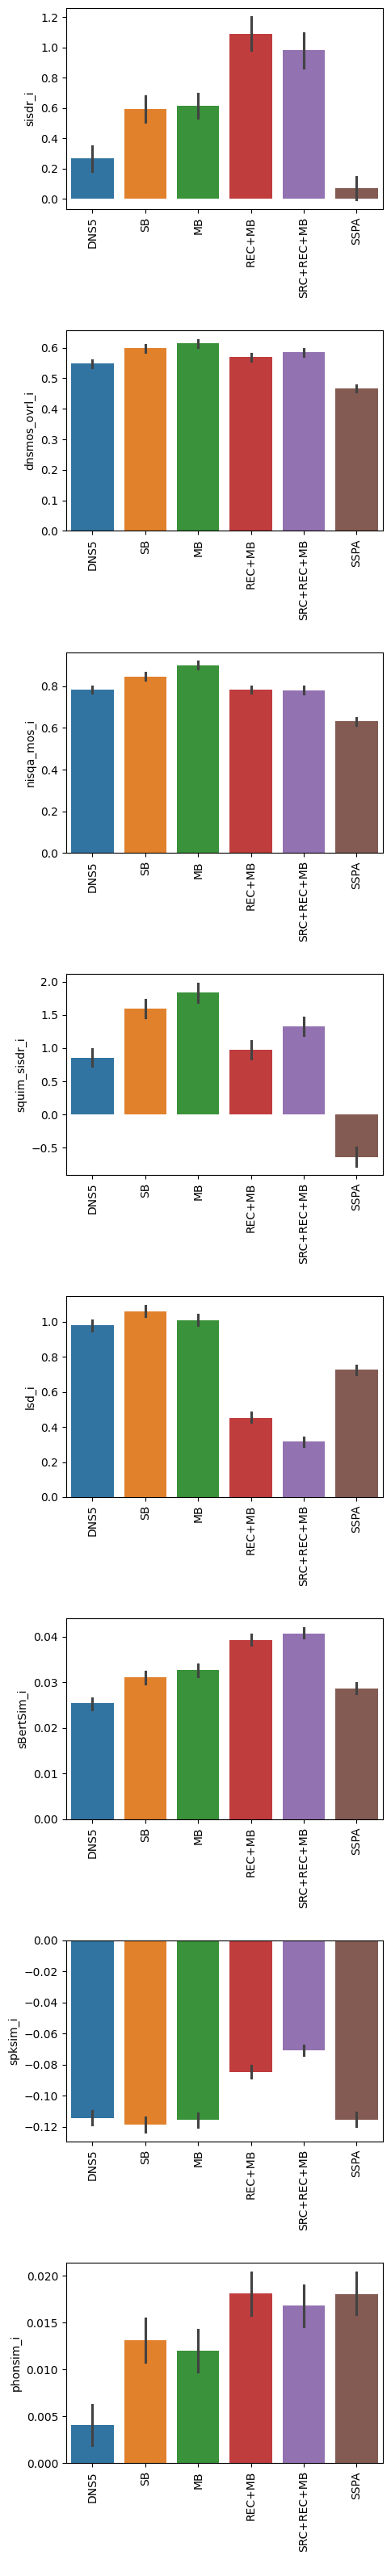

In [16]:
plt.figure(figsize=[5,32])

plt.subplot(8,1,1)
sb.barplot(data=df, x='train_rirs', y='sisdr_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([2.54, 2.62])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,2)
sb.barplot(data=df, x='train_rirs', y='dnsmos_ovrl_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([1.95, 2.02])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,3)
sb.barplot(data=df, x='train_rirs', y='nisqa_mos_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([7.6, 8.1])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,4)
sb.barplot(data=df, x='train_rirs', y='squim_sisdr_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([7.6, 8.1])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,5)
sb.barplot(data=df, x='train_rirs', y='lsd_i', hue='train_rirs', order=ordering, hue_order=ordering)
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,6)
sb.barplot(data=df, x='train_rirs', y='sBertSim_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([1.2, 2.6])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,7)
sb.barplot(data=df, x='train_rirs', y='spksim_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([1.2, 2.6])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.subplot(8,1,8)
sb.barplot(data=df, x='train_rirs', y='phonsim_i', hue='train_rirs', order=ordering, hue_order=ordering)
#plt.ylim([1.2, 2.6])
plt.xticks(rotation=90)
plt.xlabel(' ')

plt.tight_layout()

plt.savefig('intrussive.pdf')

In [17]:
# now we try to seggregate by snrs

In [18]:
df['sets']

KeyError: 'sets'

In [ ]:
sb.barplot(data=df, x='sets', y='sisdr_i')#, hue='sets', order=ordering, hue_order=ordering)

In [ ]:
sb.barplot(data=df[df['train_rirs']=='DNS5'], x='sets', y='lsd_i')#, hue='sets', order=ordering, hue_order=ordering)

In [ ]:
sb.barplot(data=df[df['train_rirs']=='MB'], x='sets', y='lsd_i')#, hue='sets', order=ordering, hue_order=ordering)